In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from tqdm import trange
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
path='/content/drive/MyDrive/project_train_data.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,ind,activity_label,ctx_a,ctx_b,ctx,endings,source_id,split,split_type,label
0,4,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",activitynet~v_-1IBHYS3L-Y,train,indomain,3
1,8,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,activitynet~v_-2dxp-mv2zo,train,indomain,3
2,9,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,activitynet~v_-2dxp-mv2zo,train,indomain,3
3,12,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",activitynet~v_-2dxp-mv2zo,train,indomain,3
4,27,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,activitynet~v_-JqLjPz-07E,train,indomain,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39905 entries, 0 to 39904
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ind             39905 non-null  int64 
 1   activity_label  39905 non-null  object
 2   ctx_a           39905 non-null  object
 3   ctx_b           14740 non-null  object
 4   ctx             39905 non-null  object
 5   endings         39905 non-null  object
 6   source_id       39905 non-null  object
 7   split           39905 non-null  object
 8   split_type      39905 non-null  object
 9   label           39905 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.0+ MB


In [6]:
df['activity_label'].value_counts()

Food and Entertaining        3962
Computers and Electronics    3715
Health                       3415
Home and Garden              2813
Finance and Business         2046
                             ... 
Playing accordion              45
Knitting                       44
Windsurfing                    41
Spread mulch                   38
Home,Categories                16
Name: activity_label, Length: 178, dtype: int64

In [7]:
df['activity_label'].count()

39905

In [8]:
df.describe()

,ind,label
count,39905.000000,39905.000000
mean,25408.912993,1.499261
std,14670.022676,1.119269
min,2.000000,0.000000
25%,12636.000000,0.000000
50%,25533.000000,1.000000
75%,38194.000000,3.000000
max,50674.000000,3.000000


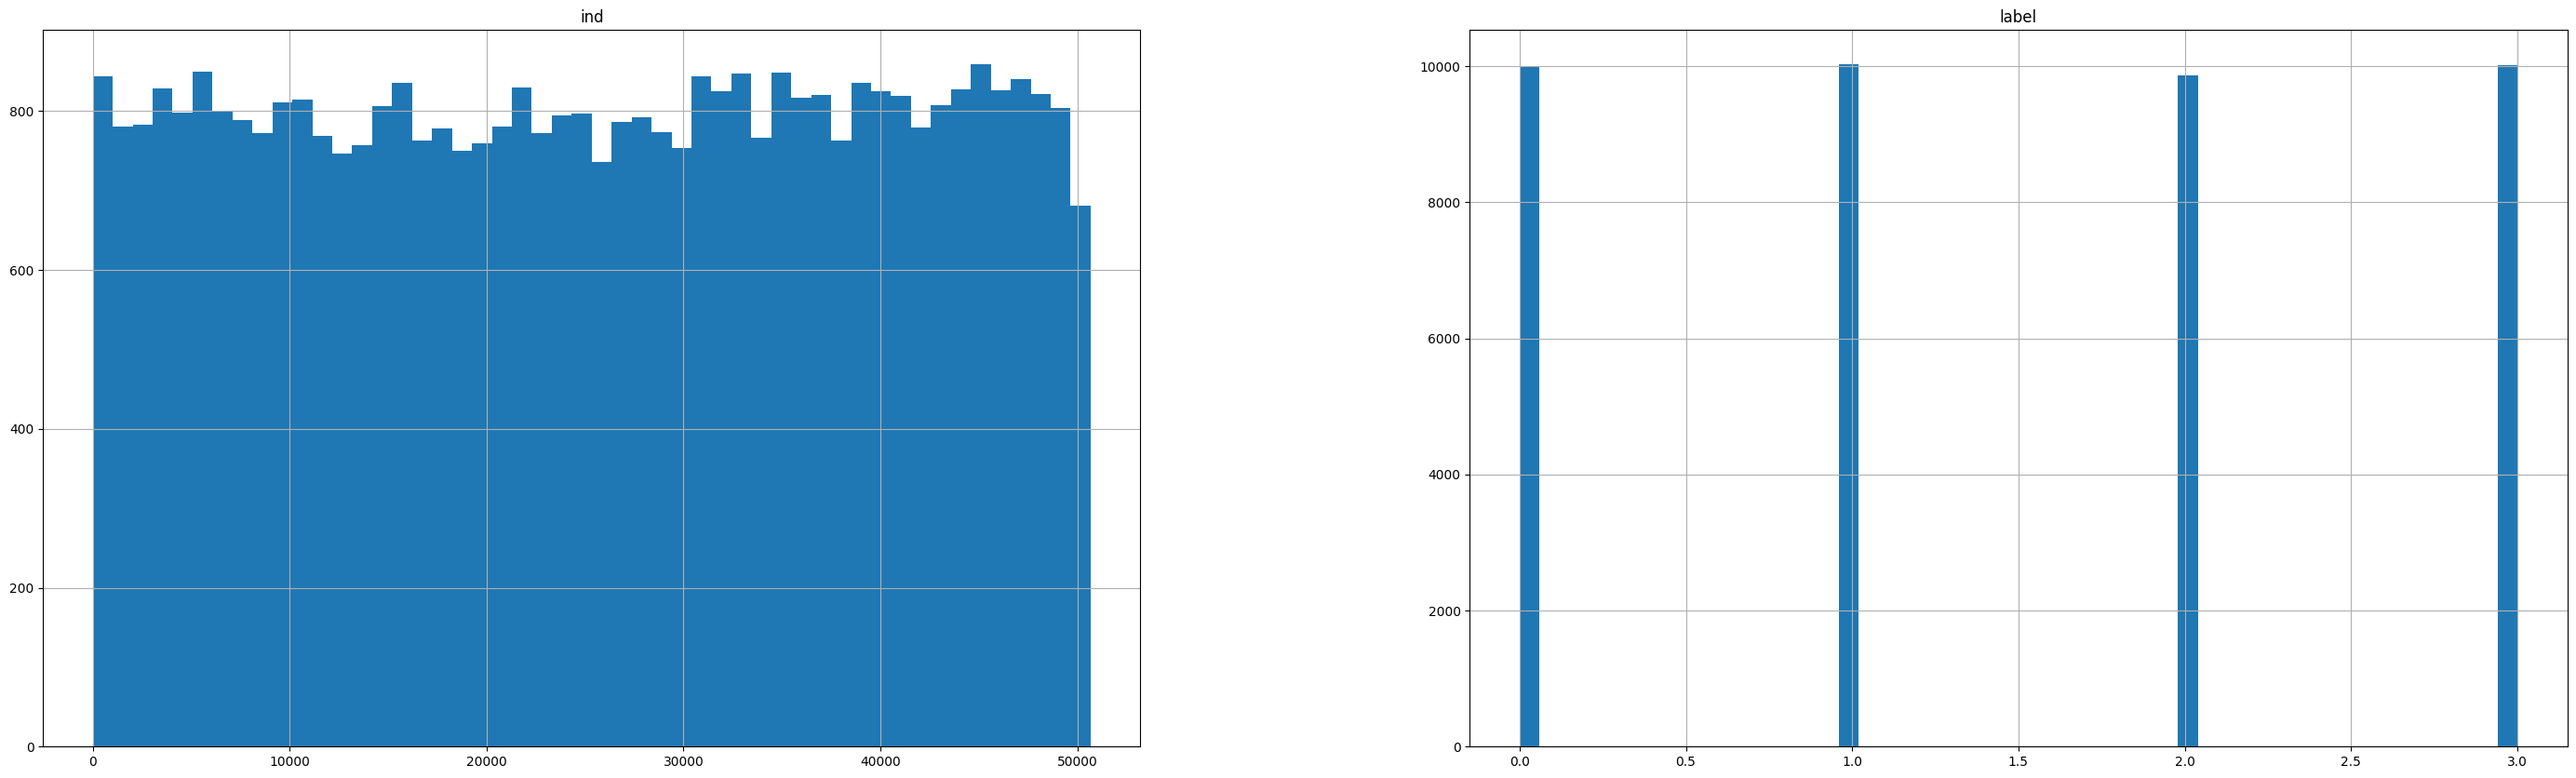

In [9]:
df.hist(bins=50, figsize=(35,10))
plt.show()

## Exploratory Data Analysis

### Counts and Length

1) Character Count

2) Word Count

3) Mean word length

4) Mean sentence length

## Character Count

In [10]:
def count_characters(statement):
    if statement is None:
        return 0
    if isinstance(statement, (float, int)):
        return 0
    return len(str(statement))

data = pd.read_csv('/content/drive/MyDrive/project_train_data.csv')
data['Character_Count_a'] = data['ctx_a'].apply(count_characters)
data['Character_Count_b'] = data['ctx_b'].apply(count_characters)
data['Character_Count_c'] = data['ctx'].apply(count_characters)
data['Character_Count_end'] = data['endings'].apply(count_characters)

data.head(10)

,ind,activity_label,ctx_a,ctx_b,ctx,endings,source_id,split,split_type,label,Character_Count_a,Character_Count_b,Character_Count_c,Character_Count_end
0,4,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",activitynet~v_-1IBHYS3L-Y,train,indomain,3,107,4,112,297
1,8,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,activitynet~v_-2dxp-mv2zo,train,indomain,3,95,8,104,176
2,9,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,activitynet~v_-2dxp-mv2zo,train,indomain,3,155,7,163,251
3,12,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",activitynet~v_-2dxp-mv2zo,train,indomain,3,115,20,136,177
4,27,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,activitynet~v_-JqLjPz-07E,train,indomain,2,88,25,114,211
5,29,Getting a haircut,The man in the blue shirt sits on the chair ne...,he,The man in the blue shirt sits on the chair ne...,['drops the water faucet in the sink.'\n 'then...,activitynet~v_-JqLjPz-07E,train,indomain,3,100,2,103,207
6,30,Getting a haircut,The man in the blue shirt sits on the chair ne...,he,The man in the blue shirt sits on the chair ne...,['then combs it and blow dries his hair after ...,activitynet~v_-JqLjPz-07E,train,indomain,0,149,2,152,255
7,31,Getting a haircut,He scrubs in the shampoo and then washes it of...,he,He scrubs in the shampoo and then washes it of...,['then rinses it off in the sink.'\n 'lets his...,activitynet~v_-JqLjPz-07E,train,indomain,2,116,2,119,229
8,32,Getting a haircut,He then combs it and blow dries his hair after...,he,He then combs it and blow dries his hair after...,['places six screws on the front of the hair t...,activitynet~v_-JqLjPz-07E,train,indomain,1,135,2,138,323
9,33,Getting a haircut,He uses an electric clipper to groom the sideb...,he,He uses an electric clipper to groom the sideb...,['then picks up some lipstick on the table to ...,activitynet~v_-JqLjPz-07E,train,indomain,1,131,2,134,248


In [11]:
print(data['Character_Count_a'].mean())
print(data['Character_Count_b'].mean())
print(data['Character_Count_c'].mean())
print(data['Character_Count_end'].mean())


214.18228292193962
3.313669966169653
217.86533015912792
560.8344317754668


## Word Count

In [12]:
word_count = data['ctx_a'][0].split()
len(word_count)

def count_word(statement):
    if isinstance(statement, (float, int)):
        return 0
    return len(statement.split())

data['Word_count_a'] = data['ctx_a'].apply(count_word)
data['Word_Count_b'] = data['ctx_b'].apply(count_word)
data['Word_Count_c'] = data['ctx'].apply(count_word)
data['Word_Count_end'] = data['endings'].apply(count_word)

data.head(10)

,ind,activity_label,ctx_a,ctx_b,ctx,endings,source_id,split,split_type,label,Character_Count_a,Character_Count_b,Character_Count_c,Character_Count_end,Word_count_a,Word_Count_b,Word_Count_c,Word_Count_end
0,4,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",activitynet~v_-1IBHYS3L-Y,train,indomain,3,107,4,112,297,20,1,21,57
1,8,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,activitynet~v_-2dxp-mv2zo,train,indomain,3,95,8,104,176,18,2,20,29
2,9,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,activitynet~v_-2dxp-mv2zo,train,indomain,3,155,7,163,251,29,2,31,43
3,12,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",activitynet~v_-2dxp-mv2zo,train,indomain,3,115,20,136,177,23,5,28,34
4,27,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,activitynet~v_-JqLjPz-07E,train,indomain,2,88,25,114,211,16,6,22,39
5,29,Getting a haircut,The man in the blue shirt sits on the chair ne...,he,The man in the blue shirt sits on the chair ne...,['drops the water faucet in the sink.'\n 'then...,activitynet~v_-JqLjPz-07E,train,indomain,3,100,2,103,207,21,1,22,39
6,30,Getting a haircut,The man in the blue shirt sits on the chair ne...,he,The man in the blue shirt sits on the chair ne...,['then combs it and blow dries his hair after ...,activitynet~v_-JqLjPz-07E,train,indomain,0,149,2,152,255,31,1,32,50
7,31,Getting a haircut,He scrubs in the shampoo and then washes it of...,he,He scrubs in the shampoo and then washes it of...,['then rinses it off in the sink.'\n 'lets his...,activitynet~v_-JqLjPz-07E,train,indomain,2,116,2,119,229,24,1,25,42
8,32,Getting a haircut,He then combs it and blow dries his hair after...,he,He then combs it and blow dries his hair after...,['places six screws on the front of the hair t...,activitynet~v_-JqLjPz-07E,train,indomain,1,135,2,138,323,26,1,27,59
9,33,Getting a haircut,He uses an electric clipper to groom the sideb...,he,He uses an electric clipper to groom the sideb...,['then picks up some lipstick on the table to ...,activitynet~v_-JqLjPz-07E,train,indomain,1,131,2,134,248,25,1,26,46


In [13]:
print(data['Word_count_a'].mean())
print(data['Word_Count_b'].mean())
print(data['Word_Count_c'].mean())
print(data['Word_Count_end'].mean())

38.21566219771958
0.7767948878586644
38.992457085578245
97.98015286304974


## Mean Word Length

In [14]:
data.describe()

,ind,label,Character_Count_a,Character_Count_b,Character_Count_c,Character_Count_end,Word_count_a,Word_Count_b,Word_Count_c,Word_Count_end
count,39905.000000,39905.000000,39905.000000,39905.000000,39905.000000,39905.000000,39905.000000,39905.000000,39905.000000,39905.000000
mean,25408.912993,1.499261,214.182283,3.313670,217.865330,560.834432,38.215662,0.776795,38.992457,97.980153
std,14670.022676,1.119269,99.933226,6.832845,95.944451,252.868777,16.647141,1.430291,15.818211,43.010617
min,2.000000,0.000000,1.000000,0.000000,29.000000,88.000000,1.000000,0.000000,8.000000,15.000000
25%,12636.000000,0.000000,119.000000,0.000000,129.000000,294.000000,23.000000,0.000000,25.000000,53.000000
50%,25533.000000,1.000000,231.000000,0.000000,231.000000,631.000000,41.000000,0.000000,41.000000,110.000000
75%,38194.000000,3.000000,292.000000,4.000000,292.000000,759.000000,51.000000,1.000000,51.000000,132.000000
max,50674.000000,3.000000,524.000000,140.000000,524.000000,1427.000000,86.000000,29.000000,86.000000,230.000000


In [15]:
data=data.drop(['activity_label','ctx_a','ctx_b','ctx','endings','source_id','split','split_type'],axis=1)
data

,ind,label,Character_Count_a,Character_Count_b,Character_Count_c,Character_Count_end,Word_count_a,Word_Count_b,Word_Count_c,Word_Count_end
0,4,3,107,4,112,297,20,1,21,57
1,8,3,95,8,104,176,18,2,20,29
2,9,3,155,7,163,251,29,2,31,43
3,12,3,115,20,136,177,23,5,28,34
4,27,2,88,25,114,211,16,6,22,39
...,...,...,...,...,...,...,...,...,...,...
39900,50667,1,304,0,304,590,56,0,56,101
39901,50668,0,253,0,253,484,45,0,45,89
39902,50670,0,136,0,136,608,24,0,24,111
39903,50672,1,285,0,285,783,52,0,52,145


In [16]:
data.to_csv('/content/drive/MyDrive/EDA.csv', index=False)

In [17]:
def visualize(col):
    plt.plot(1,1)
    sns.boxplot(y=data[col], hue = data['ind'])
    plt.ylabel(col, labelpad=20)

    plt.show()

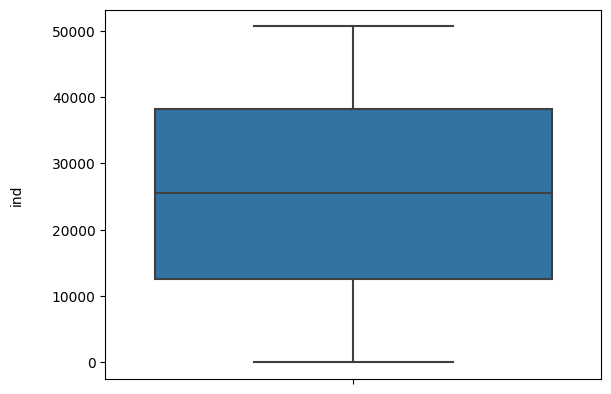

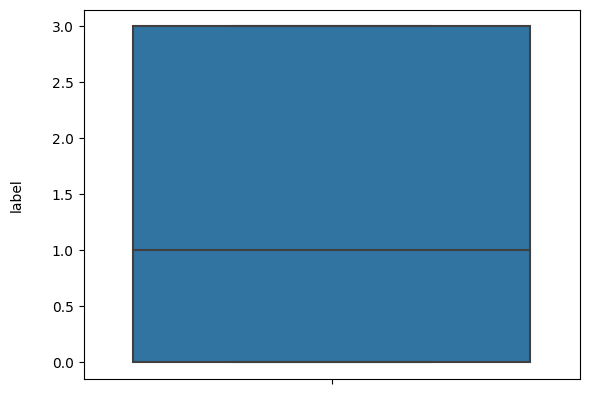

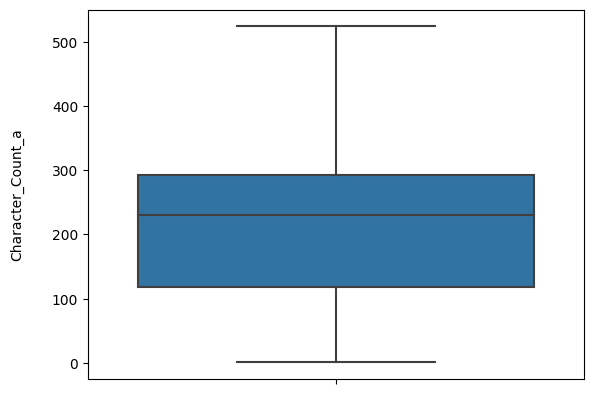

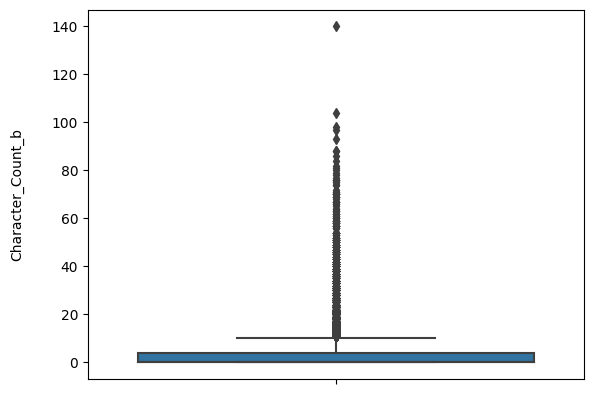

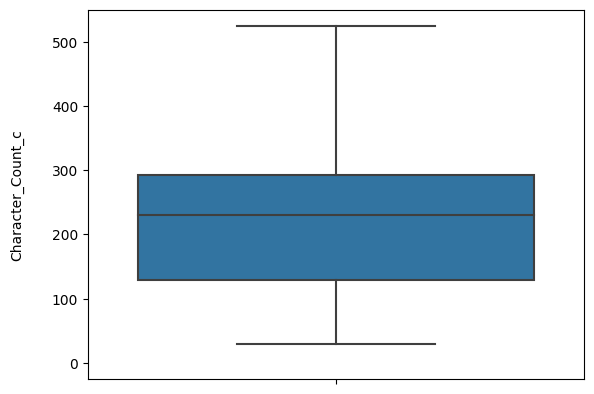

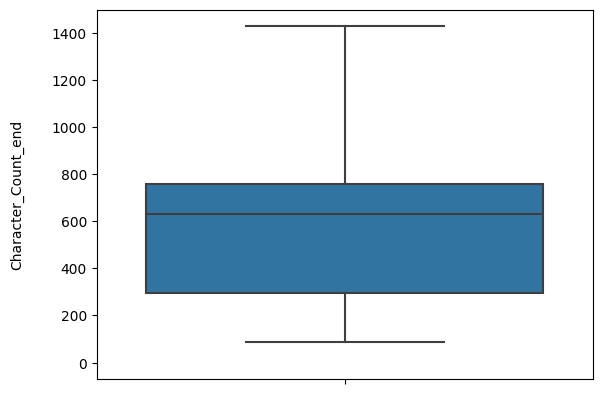

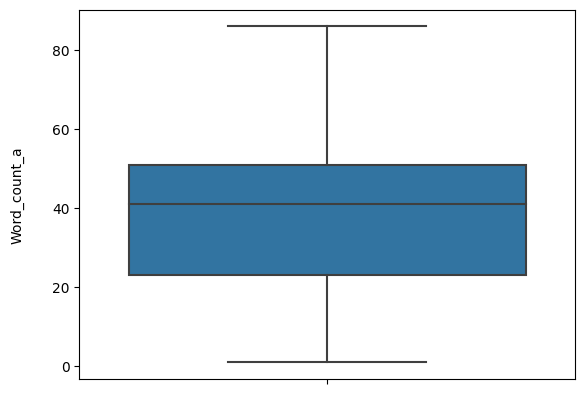

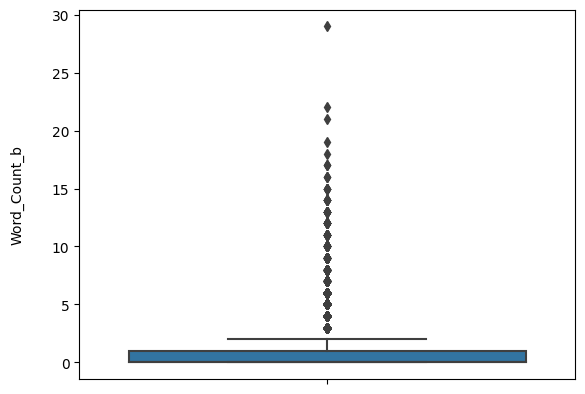

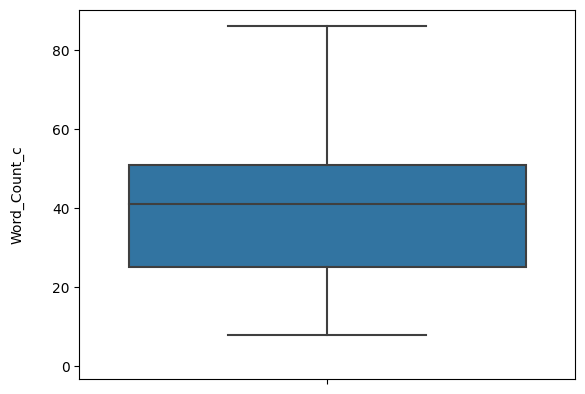

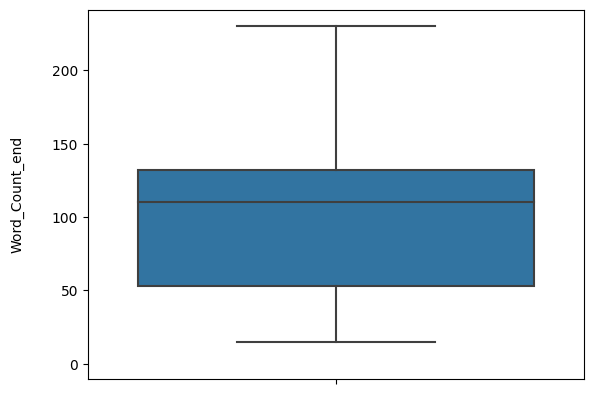

In [18]:
features = data.columns.tolist()
for feature in features:
    visualize(feature)

## Term Frequency Analysis

In [19]:
df

,ind,activity_label,ctx_a,ctx_b,ctx,endings,source_id,split,split_type,label
0,4,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",activitynet~v_-1IBHYS3L-Y,train,indomain,3
1,8,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,activitynet~v_-2dxp-mv2zo,train,indomain,3
2,9,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,activitynet~v_-2dxp-mv2zo,train,indomain,3
3,12,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",activitynet~v_-2dxp-mv2zo,train,indomain,3
4,27,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,activitynet~v_-JqLjPz-07E,train,indomain,2
...,...,...,...,...,...,...,...,...,...,...
39900,50667,Computers and Electronics,[header] How to merge documents in microsoft w...,NaN,[header] How to merge documents in microsoft w...,"['[step] As you click, the lower blue button i...",wikihow~83381,train,indomain,1
39901,50668,Sports and Fitness,[header] How to teach a bulldog to skateboard ...,NaN,[header] How to teach a bulldog to skateboard ...,['[title] Introduce your dog to the skateboard...,wikihow~83382,train,indomain,0
39902,50670,Food and Entertaining,[header] How to air dry fruit [title] Wash and...,NaN,[header] How to air dry fruit [title] Wash and...,"['[step] Keep slices equally sized, so all the...",wikihow~83384,train,indomain,0
39903,50672,Sports and Fitness,[header] How to be a good fast bowler [title] ...,NaN,[header] How to be a good fast bowler [title] ...,['[substeps] When a few balls come over the se...,wikihow~83386,train,indomain,1


In [20]:
features = ['ind','source_id','split','split_type','label']
df1=df.drop(features, axis=1)
df1

,activity_label,ctx_a,ctx_b,ctx,endings
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut..."
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and..."
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...
...,...,...,...,...,...
39900,Computers and Electronics,[header] How to merge documents in microsoft w...,NaN,[header] How to merge documents in microsoft w...,"['[step] As you click, the lower blue button i..."
39901,Sports and Fitness,[header] How to teach a bulldog to skateboard ...,NaN,[header] How to teach a bulldog to skateboard ...,['[title] Introduce your dog to the skateboard...
39902,Food and Entertaining,[header] How to air dry fruit [title] Wash and...,NaN,[header] How to air dry fruit [title] Wash and...,"['[step] Keep slices equally sized, so all the..."
39903,Sports and Fitness,[header] How to be a good fast bowler [title] ...,NaN,[header] How to be a good fast bowler [title] ...,['[substeps] When a few balls come over the se...


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39905 entries, 0 to 39904
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   activity_label  39905 non-null  object
 1   ctx_a           39905 non-null  object
 2   ctx_b           14740 non-null  object
 3   ctx             39905 non-null  object
 4   endings         39905 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [22]:
def corpus(text):
    if text is None:
        return " "
    text_list = text.split()
    return text_list

In [23]:
df1['activity_label_l'] = df1['activity_label'].apply(corpus)
df1['ctx_a_list'] = df1['ctx_a'].apply(corpus)
# df1['ctx_b_list'] = df1['ctx_b'].apply(corpus)
df1['ctx_list'] = df1['ctx'].apply(corpus)
df1['endings_list'] = df1['endings'].apply(corpus)

df1.head(10)

,activity_label,ctx_a,ctx_b,ctx,endings,activity_label_l,ctx_a_list,ctx_list,endings_list
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...","[Removing, ice, from, car]","[Then,, the, man, writes, over, the, snow, cov...","[Then,, the, man, writes, over, the, snow, cov...","[[',, the, man, adds, wax, to, the, windshield..."
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,"[Baking, cookies]","[A, female, chef, in, white, uniform, shows, a...","[A, female, chef, in, white, uniform, shows, a...","[['contain, egg, yolks, and, baking, soda.', '..."
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,"[Baking, cookies]","[A, female, chef, in, white, uniform, shows, a...","[A, female, chef, in, white, uniform, shows, a...","[['is, seen, moving, on, a, board, and, cuttin..."
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...","[Baking, cookies]","[A, tray, of, potatoes, is, loaded, into, the,...","[A, tray, of, potatoes, is, loaded, into, the,...","[['is, placed, onto, a, baked, potato.', ',, l..."
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,"[Getting, a, haircut]","[The, man, in, the, center, is, demonstrating,...","[The, man, in, the, center, is, demonstrating,...","[['is, standing, on, the, sponge, cutting, the..."
5,Getting a haircut,The man in the blue shirt sits on the chair ne...,he,The man in the blue shirt sits on the chair ne...,['drops the water faucet in the sink.'\n 'then...,"[Getting, a, haircut]","[The, man, in, the, blue, shirt, sits, on, the...","[The, man, in, the, blue, shirt, sits, on, the...","[['drops, the, water, faucet, in, the, sink.',..."
6,Getting a haircut,The man in the blue shirt sits on the chair ne...,he,The man in the blue shirt sits on the chair ne...,['then combs it and blow dries his hair after ...,"[Getting, a, haircut]","[The, man, in, the, blue, shirt, sits, on, the...","[The, man, in, the, blue, shirt, sits, on, the...","[['then, combs, it, and, blow, dries, his, hai..."
7,Getting a haircut,He scrubs in the shampoo and then washes it of...,he,He scrubs in the shampoo and then washes it of...,['then rinses it off in the sink.'\n 'lets his...,"[Getting, a, haircut]","[He, scrubs, in, the, shampoo, and, then, wash...","[He, scrubs, in, the, shampoo, and, then, wash...","[['then, rinses, it, off, in, the, sink.', 'le..."
8,Getting a haircut,He then combs it and blow dries his hair after...,he,He then combs it and blow dries his hair after...,['places six screws on the front of the hair t...,"[Getting, a, haircut]","[He, then, combs, it, and, blow, dries, his, h...","[He, then, combs, it, and, blow, dries, his, h...","[['places, six, screws, on, the, front, of, th..."
9,Getting a haircut,He uses an electric clipper to groom the sideb...,he,He uses an electric clipper to groom the sideb...,['then picks up some lipstick on the table to ...,"[Getting, a, haircut]","[He, uses, an, electric, clipper, to, groom, t...","[He, uses, an, electric, clipper, to, groom, t...","[['then, picks, up, some, lipstick, on, the, t..."


In [24]:
corpus1=[]
corpus2=[]
corpus3=[]
corpus4=[]

for i in trange(df1.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus1 += df1['activity_label_l'][i]
    corpus2 += df1['ctx_a_list'][i]
    corpus3 += df1['ctx_list'][i]
    corpus4 += df1['endings_list'][i]

print(len(corpus1))
print(len(corpus2))
print(len(corpus3))
print(len(corpus4))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 39905/39905 [00:01<00:00, 20928.29it/s]

93033
1524996
1555994
3909898


In [25]:
mostCommon1 = Counter(corpus1).most_common(10)
mostCommon2 = Counter(corpus2).most_common(10)
mostCommon3 = Counter(corpus3).most_common(10)
mostCommon4 = Counter(corpus4).most_common(10)

print(mostCommon1)
print('\n')
print(mostCommon2)
print('\n')
print(mostCommon3)
print('\n')
print(mostCommon4)

[('and', 17711), ('Food', 3962), ('Entertaining', 3962), ('Computers', 3715), ('Electronics', 3715), ('Health', 3415), ('Home', 2813), ('Garden', 2813), ('Finance', 2046), ('Business', 2046)]


[('the', 65738), ('to', 65094), ('a', 57462), ('and', 33763), ('[title]', 29757), ('your', 28171), ('of', 27014), ('How', 25217), ('[header]', 25165), ('[step]', 24167)]


[('the', 71533), ('to', 65116), ('a', 59669), ('and', 34068), ('[title]', 29757), ('your', 28171), ('of', 27490), ('How', 25217), ('[header]', 25165), ('[step]', 24167)]


[('the', 218868), ('to', 126373), ('a', 115082), ('and', 107761), ('you', 78848), ('your', 70944), ('of', 70602), ('in', 52959), ('on', 37742), ('or', 37301)]


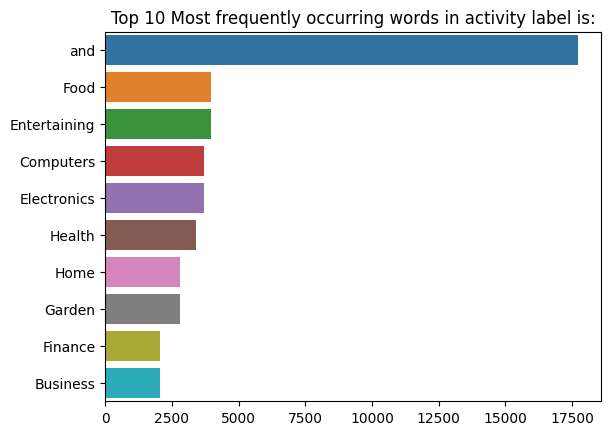

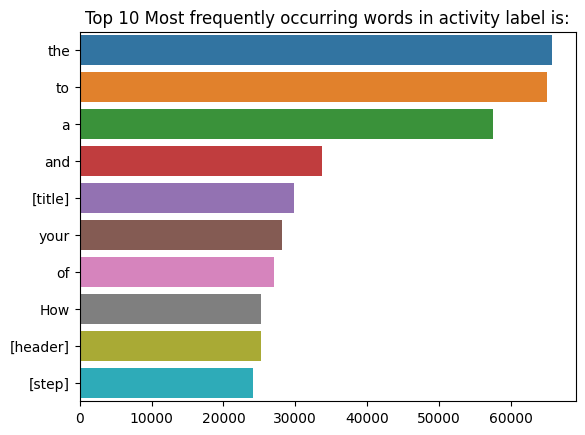

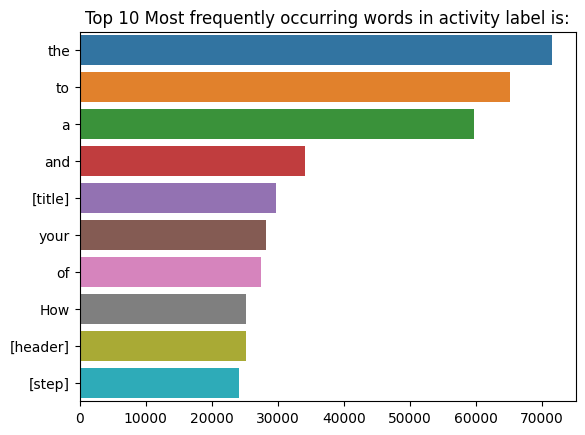

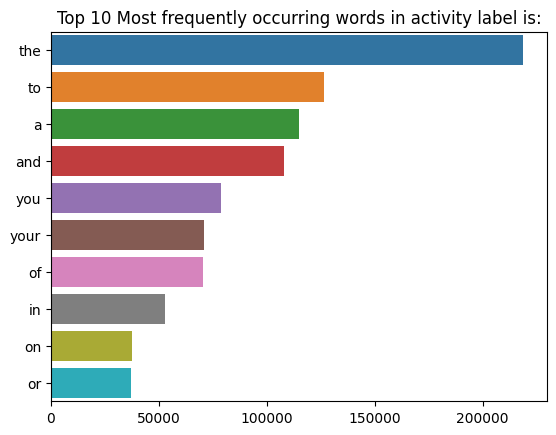

In [26]:
def ploty(mC):
    words = []  # Create separate lists for each plot
    freq = []
    for word, count in mC:
        words.append(word)
        freq.append(count)

    sns.barplot(x=freq, y=words)
    plt.title('Top 10 Most frequently occurring words in activity label is:')
    plt.show()

# First plot
ploty(mostCommon1)

# Second plot
ploty(mostCommon2)

# Third plot
ploty(mostCommon3)

# Forth plot
ploty(mostCommon4)


## Most Frequently occuring N_grams

In [27]:
def CountV(inp):
    cv = CountVectorizer(ngram_range=(2,2))
    bigrams = cv.fit_transform(inp)
    count_values = bigrams.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i],k) for k, i in cv.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngrams"]
    return ngram_freq

In [28]:
ngram_freq = CountV(df['activity_label'])
ngram_freq

,frequency,ngrams
0,3962,food and
1,3962,and entertaining
2,3715,computers and
3,3715,and electronics
4,2813,home and
...,...,...
168,54,beach volleyball
169,46,drinking beer
170,45,playing accordion
171,38,spread mulch


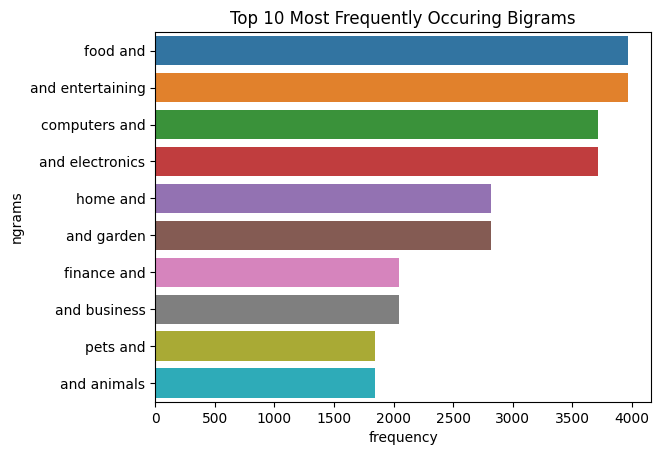

In [29]:
sns.barplot(x = ngram_freq['frequency'][:10], y=ngram_freq['ngrams'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

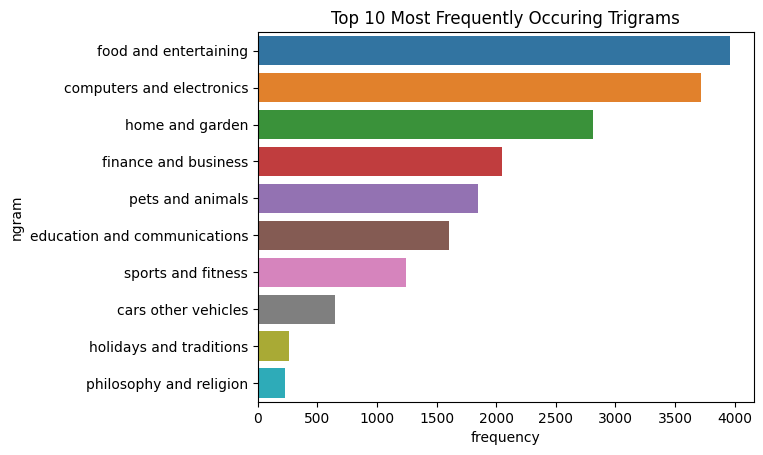

In [30]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['activity_label'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

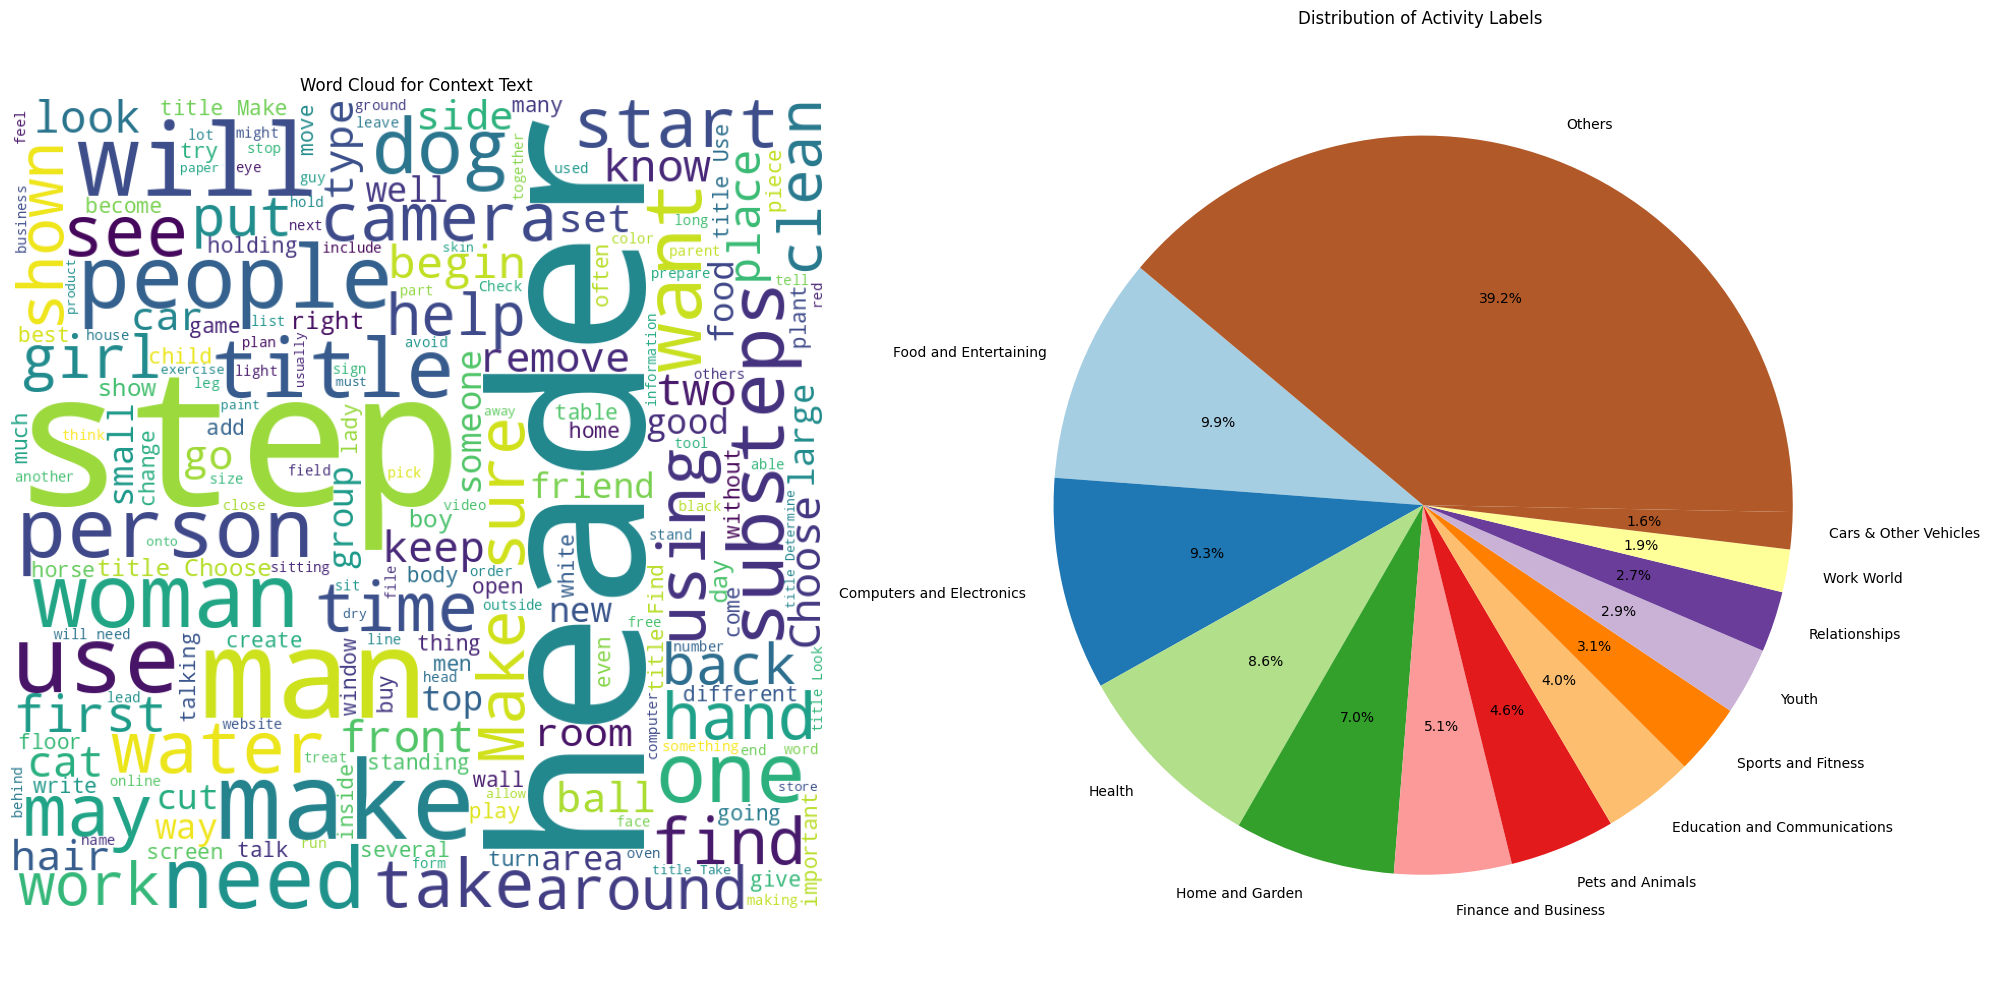

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

train_df = pd.read_csv(path)


def create_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10).generate(text)
    return wordcloud

def create_pie_chart(counts):
    other_activities = counts[counts < (0.01 * train_df.shape[0])]
    counts = counts[counts >= (0.01 * train_df.shape[0])]
    counts['Others'] = other_activities.sum()

    colors = plt.cm.Paired(range(len(counts)))
    return counts, colors


all_ctx_text = ' '.join(train_df['ctx'].astype(str))
wordcloud = create_wordcloud(all_ctx_text)


activity_counts = train_df['activity_label'].value_counts()
modified_counts, pie_colors = create_pie_chart(activity_counts)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Word Cloud
ax[0].imshow(wordcloud)
ax[0].axis("off")
ax[0].set_title('Word Cloud for Context Text')

# Pie Chart
ax[1].pie(modified_counts, labels=modified_counts.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
ax[1].axis('equal')
ax[1].set_title('Distribution of Activity Labels ')

plt.tight_layout()
plt.show()
